In [25]:
import pandas as pd
import matplotlib.pyplot as plt

Ker je csv file z podatki za igralce nabran za več let, se igralci seveda v statistikah ponavljajo. Torej en igralec ima lahko na grafu torej do 10 točk, ozirom prispeva 10 različnih rezultatov. Ta številka je ponavadi manjša saj ni veliko igralcev, ki bi lahko igrali 10 let zapored v tako eltini ligi, saj ko so mladi imajo premalo izkušenj, ko pa dobijo izkušnje pa začnejo izgubljati moč. Torej povprečen igralec ima svoj vrhunec 5 let(nepreverjen podatek). Lahko pa rečemo da so vsi igralci ki so v csv filu vrhunski športniki, saj da igraš v tej ligi že kar izjemen dosežek. Sezona pri hokeju je sestavljena iz 2 delov: redni del in končnica. Med rednim delom ekipe, ki jih je nekje med 30 in 40, igrajo za 16 mest v končnici. To se igra približn od oktobra do aprila. Na koncu sezone pa pride najboljši del to je končnice. Takrat se igrajo najbolše tekme. Končnica se igra 2 meseca. Jaz sem podatke analiziral samo za redni del, čeprav po mnenju mnogih so podatki v končnici pomembnejši, ampak jih je manj


In [26]:
path = r"csv_data\csv_data"
df = pd.read_csv(path)
pd.set_option("display.max_rows", 10)
df.reset_index()

,index,Mesto na lestvici,Ime in Priimek,Pozijcija,Ekipa,Odigrane tekme,Goli,Asistence,Točke,Kazenske minute,Razlika prejetih in danih golov
0,0,1.0,Nikita Kucherov,RW,Tampa Bay Lightning,81,44,100,144,22,8
1,1,2.0,Nathan MacKinnon,C/RW,Colorado Avalanche,82,51,89,140,42,35
2,2,3.0,Connor McDavid,C,Edmonton Oilers,76,32,100,132,30,35
3,3,4.0,Artemi Panarin,LW,New York Rangers,82,49,71,120,24,18
4,4,5.0,David Pastrnak,RW,Boston Bruins,82,47,63,110,47,21
...,...,...,...,...,...,...,...,...,...,...,...
8987,8987,888.0,Jason Akeson,RW,Philadelphia Flyers,13,0,0,0,8,-1
8988,8988,889.0,Kimmo Timonen,D,totals,16,0,0,0,2,-3
8989,8989,890.0,Luke Witkowski,D/RW,Tampa Bay Lightning,16,0,0,0,15,0
8990,8990,891.0,Greg Pateryn,D,Montréal Canadiens,17,0,0,0,6,0


Na grafu spodaj se zelo lepo vidi, kako največ igralcev doseže "malo" golov torej kar 4500, jih doseže manj kot 5, kar je slaba polovica. Nad 40 golov na sezono pa dosežejo le najbolši igralci.

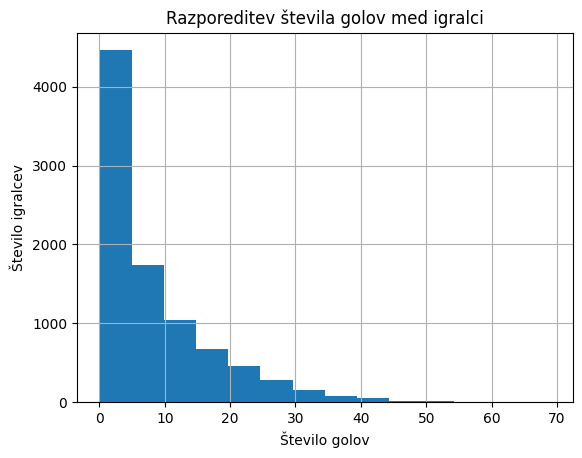

In [27]:
df['Goli'].hist(bins=14)
plt.xlabel('Število golov')
plt.ylabel('Število igralcev')
plt.title('Razporeditev števila golov med igralci')
plt.show()

In [28]:
multi_team = (df['Ekipa'] == 'totals').sum()
print("Število igralcev ki je igralo za več klubov:", multi_team)
st_vseh = df.shape[0] - 1
print("Število vseh igralcev:" + f"{st_vseh}")
procent_igralcev = round((multi_team/ st_vseh) * 100, 2)
print("Procent igralcev, ki je igralo za 2 kluba ali več:" + f"{procent_igralcev}%")


Število igralcev ki je igralo za več klubov: 730
Število vseh igralcev:8991
Procent igralcev, ki je igralo za 2 kluba ali več:8.12%


Na grafu vidimo, da je veliko več asistenc kot pa golov, to zato ker sta lahko za vsak gol podani dve asistenci, torej za vsak gol ki pade točko dobi igralec, ki je dal gol
lahko pa zravn dobita točko še dva podajalca

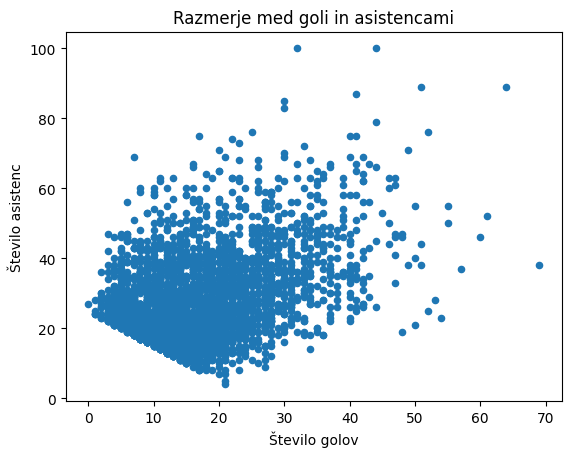

In [29]:
df_filtered = df[(df['Goli'] + df['Asistence']) >= 25] # vrze vn igralce ki so imeli manj kot 25 tock
df_filtered.plot(kind='scatter', x='Goli', y='Asistence')
plt.xlabel('Število golov')
plt.ylabel('Število asistenc')
plt.title('Razmerje med goli in asistencami')
plt.show()

Tukaj spodaj tudi graf brez presenečenj. V večini primerov velja več odigranih tekem več golov, saj če igraš več imaš več možnosti, da zadameš gol. Seveda so tudi izjeme.

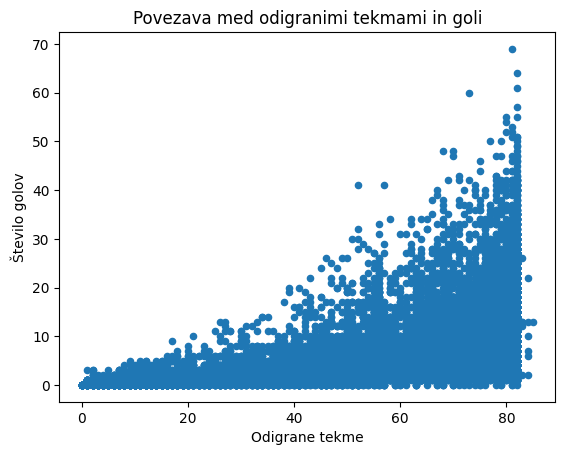

In [30]:
df.plot(kind='scatter', x = "Odigrane tekme", y = "Goli")
plt.xlabel('Odigrane tekme')
plt.ylabel('Število golov')
plt.title('Povezava med odigranimi tekmami in goli')
plt.show()

Na grafu spodaj pa se nam zdi da ni povezave med danimi goli in kazenskimi minutami, saj del ko si izključen iz igre očitno tako majhen da se ne pozna na golih. Očitno pa je da gole zadevajo tako agresivni igralci kot tudi igralci z več kazenskimi minutami. Vidimo pa da nihče nad 100 kazenskih minut ni zadel več kot 50 golov na eno sezono.

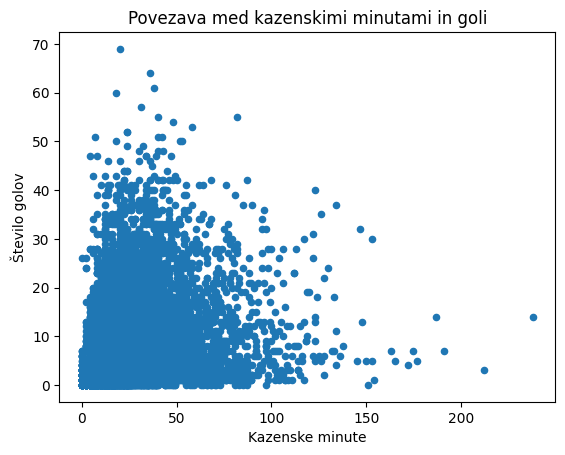

In [32]:
df.plot(kind='scatter', x = "Kazenske minute", y = "Goli")
plt.xlabel('Kazenske minute')
plt.ylabel('Število golov')
plt.title('Povezava med kazenskimi minutami in goli')
plt.show()